# Рубежный контроль №2
# Тема: Методы построения моделей машинного обучения

## Богданова В.В. ИУ5-65Б

Загрузка необходимых библиотек:

In [93]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score

Для начала заимпортим данные и добавим к ним целевое значение класса

In [2]:
data = load_wine(as_frame=True)

In [3]:
wine_info = data.data

In [4]:
wine_info['target'] = data.target

In [28]:
wine_info

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [30]:
wine_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Здесь видно, что пропусков в данных нет, у нас имеется 178 значений

In [33]:
wine_info.target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

Имеем задачу классификации с 3 целевыми классами, которые примерно одинаково распределены

In [34]:
wine_info.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Построим heatmap для лучшего визуального представления всез корреляций

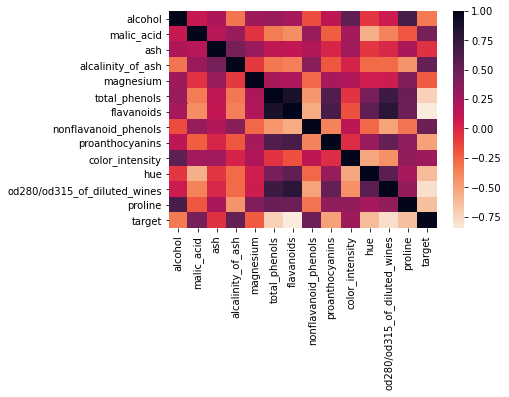

In [37]:
cmap = sns.cm.rocket_r
ax = sns.heatmap(wine_info.corr(), cmap=cmap)

Наиболее интересно для построения модели как коррелируют все поля с target value. \
Видим, что у нас наиболее влиятельные - поля malic_acid, alcalinity_of_ash и nonflavanoid_phenols. Соответственно, они должны вносить наибольший вклад в итоговую модель \
Также стоит задуматься над необходимостью некоторых полей, которые сильно коррелируют между собой, например, od280/od315_of_diluted_wines и flavanoids. (однако тяжело что то сказать будучи не знакомой со всеми этими характеристиками вина)

До построения модели необходимо нормализировать поля, так как все они числовые, и находятся порой в разных диапазонах (самый яркий пример -proline, измеряющийся в сотнях и тысячах, в то время как nonflavanoid_phenols меньше единицы)

In [5]:
norm_data = preprocessing.normalize(wine_info.loc[:, wine_info.columns!='target'])
target = wine_info.target

In [12]:
target.shape

(178,)

Теперь можно разделить данные на контрольную и обучающую выборки и обучить модель. Для этого используем train_test_split. Выборка состоит всего из 178 значений, поэтому на обучение возьмем 80%

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
     norm_data, target, test_size=0.2, random_state=42)

Теперь попробуем обучить SVM модель. Для проверки результатов будем использовать кросс валидацию с двумя метриками - сбалансированная точность (несмотря на и так неплохой баланс классов для достоврности будем использовать ее) и f1 score, который лучше показывает, насколько правильно мы определяем наблюдения в нужные классы и как часто ошибаемся.

In [80]:
svm_model = svm.SVC(kernel='poly', degree=3, C=1)
f1 = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
balanced_accuracy = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='balanced_accuracy').mean()
print('f1_weighted: '+ str(round(f1,2)) + ' balanced_accuracy ' + str(round(balanced_accuracy,2)))

f1_weighted: 0.53 balanced_accuracy 0.58


Теперь можно попробовать градиентный бустинг

In [74]:
model = XGBClassifier(eval_metric='mlogloss')
f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()
balanced_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='balanced_accuracy').mean()
print('f1_weighted: '+ str(round(f1,2)) + ' balanced_accuracy ' + str(round(balanced_accuracy,2)))

f1_weighted: 0.95 balanced_accuracy 0.95


Видим у бустинга намного лучшие результаты, стоит их проверить на контрольной выборке

In [94]:
svm_model.fit(X_train, y_train)
svm_res = svm_model.predict(X_test)
bascore = balanced_accuracy_score(y_test, svm_res)
f1 = f1_score(y_test, svm_res, average='weighted')
print('f1_weighted: '+ str(round(f1,2)) + ' balanced_accuracy ' + str(round(bascore,2)))

f1_weighted: 0.61 balanced_accuracy 0.6


In [95]:
model.fit(X_train, y_train)
XGB_res = model.predict(X_test)
bascore = balanced_accuracy_score(y_test, XGB_res)
f1 = f1_score(y_test, XGB_res, average='weighted')
print('f1_weighted: '+ str(round(f1,2)) + ' balanced_accuracy ' + str(round(bascore,2)))

f1_weighted: 1.0 balanced_accuracy 1.0


Из за совсем небольшой выборки и хороших результатов на обучении бустинга, получили 100% точный прогноз этой модели. SVM модель показала себя намного хуже, значит градиентный бустинг в нашем случае лучше показывает закономерности данных, и безусловно в продакшн нужно выводить его. Однако из за ограниченности количества наших данных может возникнуть еще одна проблема - при появлении новых данных, отличающихся от наших, модель может показывать результаты намного хуже. С этим может помочь периодическое дообучение модели на новых данных